In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

image_data = nib.load('../images/T1.nii.gz')
image_data_seg = nib.load('../images/estandarizada_t1.nii.gz').get_fdata()
image = image_data.get_fdata()

In [2]:
def kmeans_segmentation(image, k, tol, max_iter):
    # Inicializamos los centroides con valores entre el mínimo y el máximo valor de la imagen
    centroids = np.linspace(np.min(image), np.max(image), k)

    for i in range(max_iter):
        # Calculamos la distancia entre los valores de la imagen y los centroides
        distances = np.abs(image - centroids[..., None, None, None])

        # Asignamos cada pixel a su centroide más cercano
        segmentation = np.argmin(distances, axis=0)

        # Calculamos los nuevos centroides como la media de los valores asignados a cada cluster
        new_centroids = np.array([np.mean(image[segmentation == j]) for j in range(k)])

        # Comprobamos si la diferencia entre los nuevos y los antiguos centroides es menor que la tolerancia
        if np.all(np.abs(new_centroids - centroids) < tol):
            break

        # Asignamos los nuevos centroides
        centroids = new_centroids

    return segmentation

In [3]:
segmentation = kmeans_segmentation(image_data_seg,10,1,10)


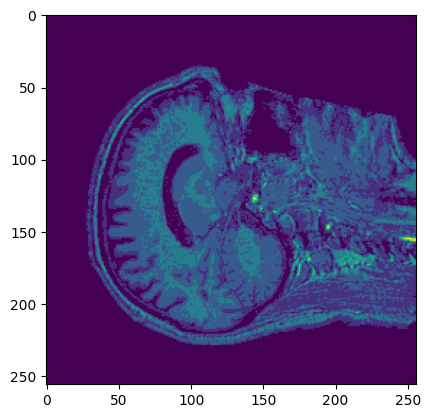

In [4]:
plt.imshow(segmentation[:, :, 80])